In [7]:
"""
Reference: https://chisness.github.io/2020-01-14/policy-and-value-iteration-gambler-problem 
Interestingly, the code uses np.float128, which is no longer supported in numpy 1.2.5+
when trying to use float64 or longfloat, the end result is the same as in the gampler.ipynb

Discussion related to solution stability:
http://incompleteideas.net/book/first/gamblers.html
"""

import numpy as np
import matplotlib.pyplot as plt

PRECISION_TYPE = np.longfloat
p_heads = .4
GAMMA = 1
rewards = np.zeros(101) #rewards for each state including 100
rewards[100] = 1

class policy_iteration:
	def __init__(self):
		self.val_state = np.zeros(101)
		self.policy = np.zeros(100)

	def bellman(self, state, action, val_state):
		return p_heads * (rewards[state + action] + GAMMA * val_state[state + action]) + (1 - p_heads) * (rewards[state - action] + GAMMA * val_state[state - action])

	def policy_evaluation(self, epsilon = 1e-100):
		while True:
			delta = 0
			#print('STARTING POLICY EVALUATION')
			for state in range(1,100):
				v = self.val_state[state]
				# print('state', state)
				# print('policy at state', self.policy[state])
				# print('val state', self.val_state)
				self.val_state[state] = self.bellman(state, int(self.policy[state]), self.val_state)
				#val_state[state] is weighted sum over all possible transitions for the policy from this state
				delta = max(delta, np.abs(self.val_state[state] - v))
			if delta < epsilon:
				break
		return self.policy_improvement()

	def policy_improvement(self):
		policy_stable = True
		#print('STARTING POLICY IMPROVEMENT')
		for state in range(1,100):
			old_action = self.policy[state]
			max_action = min(state, 100-state)
			val_action = np.zeros(max_action+1)
			for action in range(1, max_action+1):
				val_action[action] = self.bellman(state, action, self.val_state)
			#x = np.argwhere(val_action == np.max(val_action))
			#self.policy[state] = x[-1]
			self.policy[state] = np.argmax(val_action)
			# print('state', state)
			# print(np.argwhere(val_action >= np.max(val_action)).squeeze())
			# print(self.policy[state])
			# #print(np.argwhere(val_action >= np.max(val_action)*0.99).squeeze())
			# print(np.random.choice(np.argwhere(val_action == np.max(val_action)).squeeze()))
			#self.policy[state] = np.random.choice(np.argwhere(val_action == np.max(val_action)).squeeze())
			
			if old_action != self.policy[state]:
				policy_stable = False
				print('Not stable state', state)
		print('Stable situation', policy_stable)
		if policy_stable != True:
				self.policy_evaluation()
		return self.val_state, self.policy

import numpy as np
import matplotlib.pyplot as plt

p_heads = .4
GAMMA = 1
rewards = np.zeros(101) #rewards for each state including 100
rewards[100] = 1

class value_iteration:
	def __init__(self):
		self.val_state = np.zeros(101, dtype=PRECISION_TYPE) #start_state is from 1 to 99 (0 and 100 are dummy)
		self.policy = np.zeros(100, dtype=PRECISION_TYPE) #policy for each state
	
	def bellman(self, state, action, val_state):
		return p_heads * (rewards[state + action] + GAMMA * val_state[state + action]) + (1 - p_heads) * (rewards[state - action] + GAMMA * val_state[state - action])

	def val_iteration(self, epsilon = 1e-50):
		while True:
			delta = 0
			for state in range(1,100): 
				v = self.val_state[state] 
				max_action = min(state, 100-state)
				val_action = np.zeros(max_action+1, dtype=PRECISION_TYPE)
				for action in range(1, max_action+1):
					val_action[action] = self.bellman(state, action, self.val_state) 
					#val is weighted val (by p_head) of next state value or 1 if reach 100
					if state == 50:
						print(action, val_action[action])
				self.val_state[state] = np.max(val_action)
				delta = max(delta, np.abs(self.val_state[state] - v)) #find maximum change over all states
			if delta < epsilon:
				break
		return self.policy_it()


	def policy_it(self):
		for state in range(1,100):
			max_action = min(state, 100-state)
			val_action = np.zeros(max_action+1)
			for action in range(1, max_action+1):
				val_action[action] = self.bellman(state, action, self.val_state)
			best_action = np.argmax(val_action)
			self.policy[state] = best_action
		return self.val_state, self.policy

1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.4
1 0.38133760000000005
2 0.3688960000000001
3 0.3688960000000001
4 0.3481600000000001
5 0.3481600000000001
6 0.3481600000000001
7 0.3136000000000001
8 0.3136000000000001
9 0.3136000000000001
10 0.3136000000000001
11 0.3136000000000001
12 0.3136000000000001
13 0.25600000000000006
14 0.25600000000000006
15 0.25600000000000006
16 0.25600000000000006
17 0.25600000000000006
18 0.25600000000000006
19 0.25600000000000006
20 0.25600000000000006
21 0.25600000000000006
22 0.25600000000000006
23 0.25600000000000006
24 0.25600000000000006
25 0.35200000000000004
26 0.256
27 0.256
28 0.256
29 0.256
30 0.256
31 0.256
32 0.256
33 0.256
34 0.256
35 0.256
36 0.256
37 0.

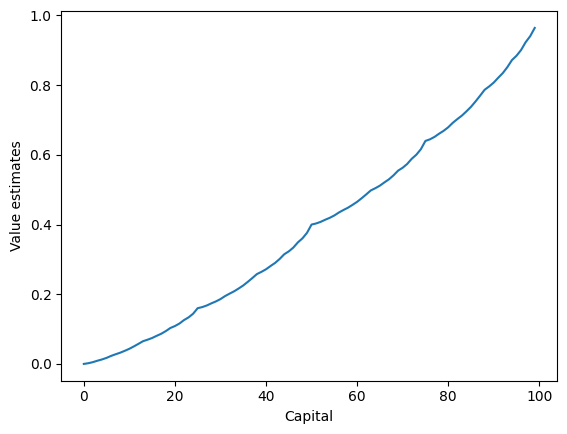

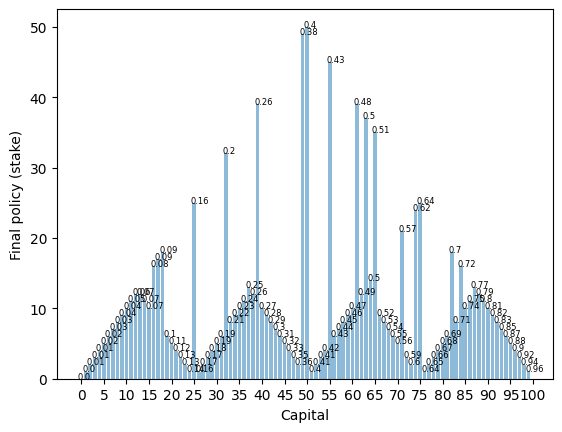

In [8]:
vi = value_iteration()
v, p = vi.val_iteration()
print(v)
print(p)

plt.plot(range(100), v[:100])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

plt.bar(range(100), p, align = 'center', alpha = 0.5)
for i in range(100):
	plt.text(i - 0.75, p[i] + 0.01, str(round(v[i],2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final policy (stake)')
plt.show()

Not stable state 50
Not stable state 51
Not stable state 52
Not stable state 53
Not stable state 54
Not stable state 55
Not stable state 56
Not stable state 57
Not stable state 58
Not stable state 59
Not stable state 60
Not stable state 61
Not stable state 62
Not stable state 63
Not stable state 64
Not stable state 65
Not stable state 66
Not stable state 67
Not stable state 68
Not stable state 69
Not stable state 70
Not stable state 71
Not stable state 72
Not stable state 73
Not stable state 74
Not stable state 75
Not stable state 76
Not stable state 77
Not stable state 78
Not stable state 79
Not stable state 80
Not stable state 81
Not stable state 82
Not stable state 83
Not stable state 84
Not stable state 85
Not stable state 86
Not stable state 87
Not stable state 88
Not stable state 89
Not stable state 90
Not stable state 91
Not stable state 92
Not stable state 93
Not stable state 94
Not stable state 95
Not stable state 96
Not stable state 97
Not stable state 98
Not stable state 99


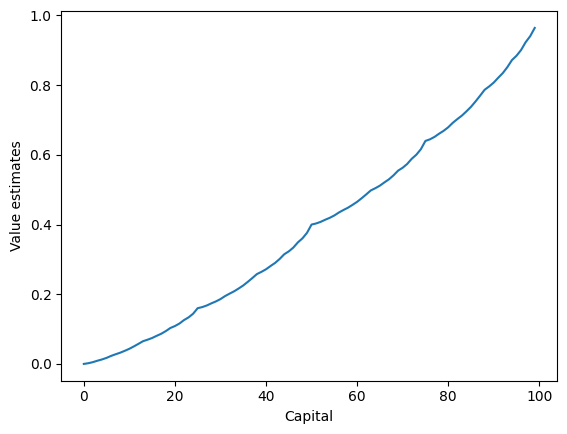

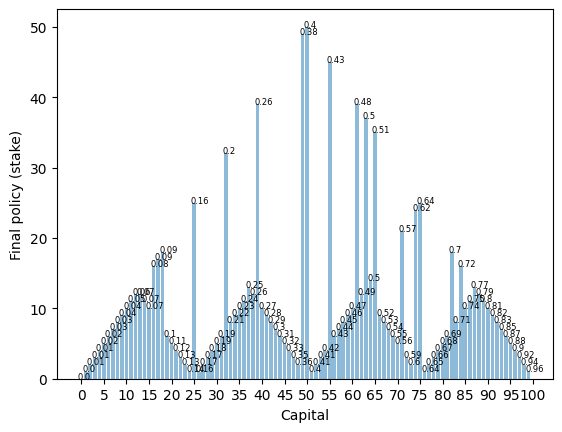

In [9]:
pi = policy_iteration()
v, p = pi.policy_evaluation()
print(v)
print(p)

plt.plot(range(100), v[:100])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

plt.bar(range(100), p, align = 'center', alpha = 0.5)
for i in range(100):
	plt.text(i - 0.75, p[i] + 0.01, str(round(v[i],2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final policy (stake)')
plt.show()